References:
https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/09.Unsupervised_learning.ipynb

In [1]:
from sklearn.mixture import GaussianMixture

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
X = pd.read_csv("data/dataset0.csv", header = None)# Let set dataset0.csv as an example
#change the directory of csv file, you could get different results.

In [13]:
#X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1])

<Figure size 576x576 with 0 Axes>

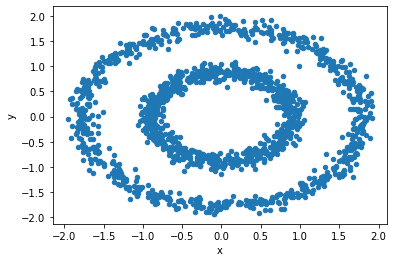

In [5]:
plt.figure(figsize=(8, 8))
X.plot.scatter(x=1, y=2)
plt.xlabel('x')
plt.ylabel('y')
mkft1 = plt.show()

In [6]:
gm = GaussianMixture(n_components=2, n_init=10)

In [7]:
X1 = X.drop(axis = 1, columns = 0 )
X1 = X1.drop(axis = 1, columns = 3)

In [8]:
X1 

,1,2
0,-1.211679,-1.246886
1,1.663585,0.343009
2,0.979093,-0.009582
3,1.558895,0.670995
4,0.777461,-0.525246
...,...,...
1495,0.844952,0.062221
1496,0.725940,0.490716
1497,-0.617111,-0.638345
1498,0.030292,-1.686947


In [9]:
gm.fit(X1)

GaussianMixture(n_components=2, n_init=10)

In [10]:
gm.weights_

array([0.49685988, 0.50314012])

In [11]:
gm.covariances_

array([[[ 0.40858075, -0.19726142],
        [-0.19726142,  0.92465365]],

       [[ 0.41041839, -0.19719928],
        [-0.19719928,  0.94006489]]])

In [12]:
gm.n_iter_

4

In [13]:
gm.predict(X1)[:15]

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [14]:
np.round(gm.predict_proba(X1)[:15], 5)

array([[9.9927e-01, 7.3000e-04],
       [3.2000e-04, 9.9968e-01],
       [1.1970e-02, 9.8803e-01],
       [3.1000e-04, 9.9969e-01],
       [6.1330e-02, 9.3867e-01],
       [9.9083e-01, 9.1700e-03],
       [6.4000e-04, 9.9936e-01],
       [1.8690e-02, 9.8131e-01],
       [9.4412e-01, 5.5880e-02],
       [6.2950e-02, 9.3705e-01],
       [4.5221e-01, 5.4779e-01],
       [9.4162e-01, 5.8380e-02],
       [6.4254e-01, 3.5746e-01],
       [1.4694e-01, 8.5306e-01],
       [6.6000e-04, 9.9934e-01]])

In [15]:
X_new, y_new = gm.sample(6)

In [16]:
X_new

array([[-1.34549262,  0.04332157],
       [-0.03735171,  1.63179838],
       [ 0.73711907,  0.88264764],
       [ 1.40199964,  0.2201757 ],
       [ 1.16197592,  1.2284102 ],
       [ 1.20971828,  0.97569502]])

In [17]:
y_new

array([0, 1, 1, 1, 1, 1])

In [18]:
gm.score_samples(X1)[:10]

array([-3.09436744, -3.13997476, -2.0559542 , -3.13923841, -2.28945997,
       -2.03749881, -2.99934336, -3.17720045, -3.33226422, -2.25449109])

In [19]:
# Plotting decision regions
x_min, x_max = X1[1].min() - 1, X1[1].max() + 1
y_min, y_max = X1[2].min() - 1, X1[2].max() + 1

xx, yy= np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1)
                     )

In [20]:
Z = np.exp(gm.score_samples(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

In [21]:
Z

array([[9.30217588e-08, 1.94480059e-07, 3.95654186e-07, ...,
        8.32927446e-05, 5.91797800e-05, 4.09263048e-05],
       [1.44866545e-07, 3.01113788e-07, 6.09036523e-07, ...,
        1.08516476e-04, 7.66663859e-05, 5.27197197e-05],
       [2.22902794e-07, 4.60627711e-07, 9.26263957e-07, ...,
        1.39717539e-04, 9.81525941e-05, 6.71131746e-05],
       ...,
       [3.78106989e-05, 5.67335953e-05, 8.28387106e-05, ...,
        1.86698265e-06, 9.59585288e-07, 4.80019665e-07],
       [2.96174064e-05, 4.41824417e-05, 6.41390749e-05, ...,
        1.23940698e-06, 6.33415481e-07, 3.15061660e-07],
       [2.29215881e-05, 3.39958051e-05, 4.90658803e-05, ...,
        8.13111167e-07, 4.13195988e-07, 2.04359303e-07]])

In [22]:
xx

array([[-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       ...,
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215],
       [-2.95656785, -2.85656785, -2.75656785, ...,  2.64343215,
         2.74343215,  2.84343215]])

In [23]:
yy

array([[-2.93168538, -2.93168538, -2.93168538, ..., -2.93168538,
        -2.93168538, -2.93168538],
       [-2.83168538, -2.83168538, -2.83168538, ..., -2.83168538,
        -2.83168538, -2.83168538],
       [-2.73168538, -2.73168538, -2.73168538, ..., -2.73168538,
        -2.73168538, -2.73168538],
       ...,
       [ 2.76831462,  2.76831462,  2.76831462, ...,  2.76831462,
         2.76831462,  2.76831462],
       [ 2.86831462,  2.86831462,  2.86831462, ...,  2.86831462,
         2.86831462,  2.86831462],
       [ 2.96831462,  2.96831462,  2.96831462, ...,  2.96831462,
         2.96831462,  2.96831462]])

In [35]:
labels = gm.predict(X1)
labels

array([0, 1, 1, ..., 0, 0, 1])

In [42]:
X_1 = X1[1]
X_1


0      -1.211679
1       1.663585
2       0.979093
3       1.558895
4       0.777461
          ...   
1495    0.844952
1496    0.725940
1497   -0.617111
1498    0.030292
1499    1.632038
Name: 1, Length: 1500, dtype: float64

In [39]:
X_2 = X1[2]
X_2

0      -1.246886
1       0.343009
2      -0.009582
3       0.670995
4      -0.525246
          ...   
1495    0.062221
1496    0.490716
1497   -0.638345
1498   -1.686947
1499   -1.068427
Name: 2, Length: 1500, dtype: float64

In [47]:
#X_4 is the predicted values according to our GMM program.
X_3 = gm.predict(X1)
X_4 = list(X_3)
len(X_4)

1500

In [48]:
x_plot = list(X1[1])
y_plot = list(X1[2])

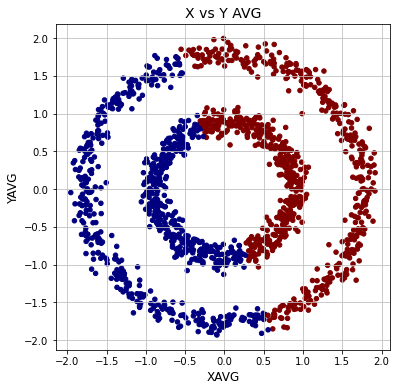

In [51]:
import matplotlib.pyplot as plt
from matplotlib  import cm
import numpy as np
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("X vs Y AVG",fontsize=14)
ax.set_xlabel("XAVG",fontsize=12)
ax.set_ylabel("YAVG",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')


# scatter with colormap mapping to X_4 value
ax.scatter(x_plot,y_plot,s=20,c=X_4, marker = 'o', cmap = cm.jet );

plt.show()

The images above is our result. It is very close to the result using Shogun lib. in C++.
Anyway, I couldn't install C++ lib. Shogun, so it is just a replacement for a GMM algorithm in clustering here.